In [457]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [458]:
outdir = '/Users/stephaniecrilly/Kortemme_lab/helix_sliding/figures'

Considering a basic binding reaction, where P is a protein, B is a binder, and PB is the protein-binder bound complex:

(1) P + B <-> PB

(2) Kd = [P][B] / [PB]

(3a) P_tot = P_free + PB 
    AND 
(3b) B_tot = B_free + PB

If B_tot >> P_tot, ligand depletion is negligble and (3b) simplifies to:

(3b.1) B_tot = ~B_free

This is the regime we are operating in for on-yeast titration experiments in which we maintain at least 10 fold molar excess of B relative to P. Given this, we can combine (2), (3a), and (3b.1) to get the following:

(4) Kd = [P_tot - PB][B_tot] / [PB] which can be rearranged to...

(5) [PB] = [P_tot][B_tot] / (Kd + [B_tot])

Dividing both sides of equation (5) by P_tot, the fraction of bound P can be expressed as the hyperbolic function:

(6) Fb = [PB] / [P_tot] = [B_tot] / (Kd + [B_tot])

We can define several equivalent functions to plot on-yeast binding data wth various input forms. 

In [459]:
#sample data, Nb-ALFA binding on-yeast
conc = np.array([100000, 31600, 10000, 1000, 100, 10, 1])
binding = np.array([125000, 119000, 100000, 99000, 70000, 20000, 5000])

max: 113176.68437039065, background: 4925.2958033559335, Kd: 70.09882872271461


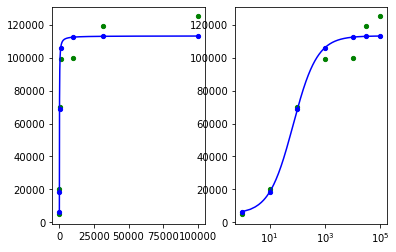

<Figure size 432x288 with 0 Axes>

In [460]:
#fits a hyperbolic curve
#takes raw binding data y_vals (eg mean fluor intensity) and returns the fitted curve
#assumes no cooperativity, hill_coeff=1
def hyperbola(b_tot, p_tot, bg, kd): #equivalent to funcHyp
    return (((p_tot-bg)*b_tot)/(kd+b_tot)) + bg #why does this not work if I don't subtract bg from p_tot? #try adding bounds to fit
                                                #also equivalent to A.M.Phillips sigmoid function modified to accept non-log transformed x_vals and y_vals

plotted_curve_range = np.linspace(conc[-1], conc[0], 100000) #making the increments smaller produces a smoother curve
popt, pcov = curve_fit(hyperbola, conc, binding)
yHYP = hyperbola(plotted_curve_range, *popt) 
print(f'max: {popt[0]}, background: {popt[1]}, Kd: {popt[2]}')

plt.subplot(1,2,1)
plt.scatter(conc, binding, marker='o', s=18, c='green', label='')
plt.scatter(conc, hyperbola(conc, *popt), marker='o', s=18, c='blue', label='')
plt.plot(plotted_curve_range, hyperbola(plotted_curve_range, *popt), ls='-', c='blue', label='')

plt.subplot(1,2,2)
plt.scatter(conc, binding, marker='o', s=18, c='green', label='')
plt.scatter(conc, hyperbola(conc, *popt), marker='o', s=18, c='blue', label='')
plt.plot(plotted_curve_range, hyperbola(plotted_curve_range, *popt), ls='-', c='blue', label='')
plt.xscale('log')

plt.show()
plt.clf()

Kd: 98.97951158654982


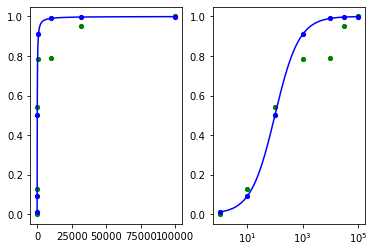

<Figure size 432x288 with 0 Axes>

In [461]:
#fits a hyperbolic curve to normalized data
#assumes binding data y_vals are min-max normalized between 0 and 1
#assumes no cooperativity, hill_coeff=1
def hyperbola_norm(b_tot, kd): #equivalent to funcHyp_norm
    return (b_tot/(kd+b_tot))

binding_min_max = list(map(lambda x: (x - np.min(binding)) / (np.max(binding) - np.min(binding)), binding))

plotted_curve_range = np.linspace(conc[-1], conc[0], 100000)
popt, pcov = curve_fit(hyperbola_norm, conc, binding_min_max) 
yHYP = hyperbola_norm(plotted_curve_range, *popt) 
print(f'Kd: {popt[0]}')

plt.subplot(1,2,1)
plt.scatter(conc, binding_min_max, marker='o', s=18, c='green', label='')
plt.scatter(conc, hyperbola_norm(conc, *popt), marker='o', s=18, c='blue', label='')
plt.plot(plotted_curve_range, hyperbola_norm(plotted_curve_range, *popt), ls='-', c='blue', label='')

plt.subplot(1,2,2)
plt.scatter(conc, binding_min_max, marker='o', s=18, c='green', label='')
plt.scatter(conc, hyperbola_norm(conc, *popt), marker='o', s=18, c='blue', label='')
plt.plot(plotted_curve_range, hyperbola_norm(plotted_curve_range, *popt), ls='-', c='blue', label='')
plt.xscale('log')

plt.show()
plt.clf()


max: 118.90039836690016, background: 35.51213399796197, kd: 1.3480099680997275


/var/folders/7h/sws1byhj2pzb__hgp1w6_3j80000gn/T/ipykernel_6356/666771800.py:4: RuntimeWarning: overflow encountered in power
  return np.log(p_tot * (10**b_tot/((10**b_tot)+(10**Kd))) + bg) #equivalent to A.M.Phillips sigmoid function
/var/folders/7h/sws1byhj2pzb__hgp1w6_3j80000gn/T/ipykernel_6356/666771800.py:4: RuntimeWarning: invalid value encountered in true_divide
  return np.log(p_tot * (10**b_tot/((10**b_tot)+(10**Kd))) + bg) #equivalent to A.M.Phillips sigmoid function


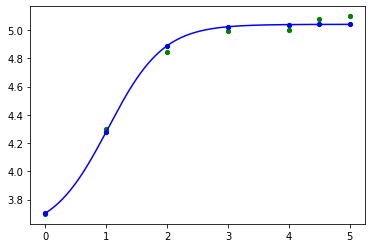

<Figure size 432x288 with 0 Axes>

In [462]:
#binding data y_vals should be passed as log10 transformed fluorescence values
#binding data x_vals should be passed as log10 transformed concentration values
def sigmoid(b_tot, Kd, p_tot, bg):
    return np.log(p_tot * (10**b_tot/((10**b_tot)+(10**Kd))) + bg) #equivalent to A.M.Phillips sigmoid function

log_conc = np.log10(conc)
log_binding = np.log10(binding)

popt, pcov = curve_fit(sigmoid, log_conc, log_binding)
print(f'max: {popt[1]}, background: {popt[2]}, kd: {popt[0]}')
yHYP = sigmoid(plotted_curve_range, *popt)   
plotted_curve_range = np.linspace(log_conc[-1], log_conc[0], 10000)

plt.scatter(log_conc, log_binding, marker='o', s=18, c='green', label='')
plt.scatter(log_conc, sigmoid(log_conc, *popt), marker='o', s=18, c='blue', label='')
plt.plot(plotted_curve_range, sigmoid(plotted_curve_range, *popt), ls='-', c='blue', label='')
plt.show()
plt.clf()

#double check curve fit parameters

max: 118.90041157174012, background: 35.51208774294862, kd: 22.284761955553808


/var/folders/7h/sws1byhj2pzb__hgp1w6_3j80000gn/T/ipykernel_6356/1520453231.py:4: RuntimeWarning: invalid value encountered in log
  return np.log(p_tot * (b_tot/((b_tot)+(Kd))) + bg) #equivalent to A.M.Phillips sigmoid function


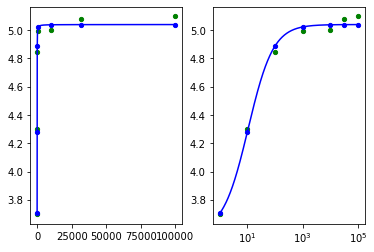

<Figure size 432x288 with 0 Axes>

In [463]:
#binding data y_vals should be passed as log10 transformed fluorescence values
#binding data x_vals should be passed as pM concentration values
def sigmoid_delog(b_tot, Kd, p_tot, bg):
    return np.log(p_tot * (b_tot/((b_tot)+(Kd))) + bg) #equivalent to A.M.Phillips sigmoid function

log_binding = np.log10(binding)

popt, pcov = curve_fit(sigmoid_delog, conc, log_binding)
print(f'max: {popt[1]}, background: {popt[2]}, kd: {popt[0]}')
yHYP = sigmoid_delog(plotted_curve_range, *popt)   
plotted_curve_range = np.linspace(conc[-1], conc[0], 1000000)

plt.subplot(1,2,1)
plt.scatter(conc, log_binding, marker='o', s=18, c='green', label='')
plt.scatter(conc, sigmoid_delog(conc, *popt), marker='o', s=18, c='blue', label='')
plt.plot(plotted_curve_range, sigmoid_delog(plotted_curve_range, *popt), ls='-', c='blue', label='')

plt.subplot(1,2,2)
plt.scatter(conc, log_binding, marker='o', s=18, c='green', label='')
plt.scatter(conc, sigmoid_delog(conc, *popt), marker='o', s=18, c='blue', label='')
plt.plot(plotted_curve_range, sigmoid_delog(plotted_curve_range, *popt), ls='-', c='blue', label='')
plt.xscale('log')

plt.show()
plt.clf()

#double check curve fit parameters

The overall observed equilibrium between two switch states with one binder site is the product of two equations and their associated equilibrium constants:

S1 <-> S2, Kconf = ?
S2 + B <-> S2B, Kd =  1e-10, Ka = 1e10

Where S1 is switch state 1 (binding site buried), S2 is switch state 2 (binding site exposed), the equilibrium constant, Kconf, between which is not known for designs. 
B is binder (eg Nb-ALFA), and S2B the switch 2 state bound to the binder, with the equilibrium constant here being the example measured Kd for Nb-ALFA binding to ALFA tag on yeast of ~100 pM (expressed here in M).

The overall observed Kapp = Ka/(1+Kconf) (https://www.sciencedirect.com/science/article/pii/S0304416515002743#bb0105)
                                            (https://www.sciencedirect.com/science/article/abs/pii/S1046202314003168)
                                            (https://books.google.com/books?hl=en&lr=&id=daxAKlHw7qQC&oi=fnd&pg=PP19&ots=nCJmCrNuno&sig=Ym7-cdi3TNWt8q_eD4SZujx-73M#v=onepage&q=polyno&f=false)

Kapp = [S2]/[S1] * [S2B]/[S2][B] = [S2B]/[S1][B]

From these equations, we can estimate the expected shift in Kapp for Nb-ALFA binding for different equilibria between the two switch states. 

Below we plot these expected curves, along with a positive (bm01-alfa-t6/Nb-ALFA) and negative control binding curve (bm01alfa-t3/Nb-ALFA). 

In [464]:
sim_conc = np.array([1e5, 1e4, 1e3, 3.16e2, 1e2, 3.16e1, 1e1, 3.16e0, 1e0, 3.16e-1])
bm01_t6_binding = np.array([69583.8, 57340.3, 49684.8, 49858.9, 39947.8, 28723.6, 14040.9, 6163.5, 2171.5, 992.5]) #20230729 data, pos ctrl
bm01_t3_binding = np.array([15563.4, 5258.0, 1178.8, 755.0, 501.2, 430.5, 422.5, 394.9, 402.4, 437.8]) #20230729 data, neg ctrl
plotted_curve_range = np.linspace(sim_conc[-1], sim_conc[0], 1000000)

#fit curves to get parameters for control curves
bm01_t6_popt, bm01_t6_pcov = curve_fit(hyperbola, sim_conc, bm01_t6_binding, bounds=[(4e2, 0, 0), (2e5, 2e5, np.inf)])
print(f'bm01_t6_max: {bm01_t6_popt[0]}, bm01_t6_background: {bm01_t6_popt[1]}, bm01_t6_Kd: {bm01_t6_popt[2]}')
bm01_t6_yHYP = hyperbola(plotted_curve_range, *popt)   
plt.plot(plotted_curve_range, hyperbola(plotted_curve_range, *bm01_t6_popt), ls='-', c='darkslategray', label=f'S2, {round(bm01_t6_popt[2])}')


bm01_t3_popt, bm01_t3_pcov = curve_fit(hyperbola, sim_conc, bm01_t3_binding, bounds=[(4e2, 0, 0), (2e5, 2e5, np.inf)])
print(f'bm01_t3_max: {bm01_t3_popt[0]}, bm01_t3_background: {bm01_t3_popt[1]}, bm01_t3_Kd: {bm01_t3_popt[2]}')
bm01_t3_yHYP = hyperbola(plotted_curve_range, *popt)   
plt.plot(plotted_curve_range, hyperbola(plotted_curve_range, *bm01_t3_popt), ls='-', c='silver', label=f'S1, {round(bm01_t3_popt[2])}')


# Kconf = [B]/[A] where A can bind ligand
# state 1 (non-binding) : state 2 (binding) = 1 : kconf, equally favored
kd = bm01_t6_popt[2] 
ka = 1/kd
kconf_1 = 1
kd_app_1 = 1/((ka)/(1+kconf_1)) #1/ to convert back to Kd from Ka

plt.plot(plotted_curve_range, hyperbola(plotted_curve_range, bm01_t6_popt[0], bm01_t6_popt[1], kd_app_1), ls='-', c='darkcyan', label=f'1:1, {round(kd_app_1)}')

# Kconf = [B]/[A] where A can bind ligand
# state 1 (non-binding) : state 2 (binding) = 10 : kconf, equally favored
kd = bm01_t6_popt[2] 
ka = 1/kd
kconf_1e1 = 1e1
kd_app_1e1 = 1/((ka)/(1+kconf_1e1)) #1/ to convert back to Kd from Ka

plt.plot(plotted_curve_range, hyperbola(plotted_curve_range, bm01_t6_popt[0], bm01_t6_popt[1], kd_app_1e1), ls='-', c='cadetblue', label=f'1:10, {round(kd_app_1e1)}')

# Kconf = [B]/[A] where A can bind ligand
# state 1 (non-binding) : state 2 (binding) = 100 : kconf, many in non-binding state
kd = bm01_t6_popt[2] 
ka = 1/kd
kconf_1e2 = 1e2
kd_app_1e2 = 1/((ka)/(1+kconf_1e2)) #1/ to convert back to Kd from Ka

plt.plot(plotted_curve_range, hyperbola(plotted_curve_range, bm01_t6_popt[0], bm01_t6_popt[1], kd_app_1e2), ls='-', c='lightseagreen', label=f'1:100, {round(kd_app_1e2)}')

# Kconf = [B]/[A] where A can bind ligand
# state 1 (non-binding) : state 2 (binding) = 1000 : kconf, many in non-binding state
kd = bm01_t6_popt[2] 
ka = 1/kd
kconf_1e3 = 1e3
kd_app_1e3 = 1/((ka)/(1+kconf_1e3)) #1/ to convert back to Kd from Ka

plt.plot(plotted_curve_range, hyperbola(plotted_curve_range, bm01_t6_popt[0], bm01_t6_popt[1], kd_app_1e3), ls='-', c='powderblue', label=f'1:1000, {round(kd_app_1e3)}')
plt.xscale('log')
plt.xlabel('[Nb-ALFA] pM', fontsize=12)
plt.ylabel('Binding (A.U.)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='S2:S1, Kd_app (pM)', loc='upper left', fontsize=10, title_fontsize=12)

plt.savefig(f'{outdir}/simulated_titration_curves.png', dpi=300, bbox_inches = 'tight')
plt.clf()

bm01_t6_max: 59248.057358026985, bm01_t6_background: 1853.1728319609556, bm01_t6_Kd: 43.910202831056566
bm01_t3_max: 20233.08288603568, bm01_t3_background: 448.29307567384564, bm01_t3_Kd: 30915.287814379222


<Figure size 432x288 with 0 Axes>

Above we can see that as the ratio of state 1 to state 2 decreases the curves shift rightward and the Kd apparent for binding increases. 

For a conformational switch equilibrium between states in which state 1 (non-binding) is 1000 fold favored over state 2 (binding), Kd apparent begins to approach that observed for a negative control.

Also of note for the plotted negative control binding, the upper asymptote which corresponds to the total number of functional protein molecules displayed on the surface and available for binding, is lower than for the positive control. This could reflect decreased surface display due to poor expression or aggregation in the secretory pathway, or aggregation on the cell surface occluding and decreasing the total number of available binding sites. 

A change in this upper asymptote may be observed for some designs which have some of the above properties. 